# Chest X-Ray Pneumonia Detection

Using [this dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) from Kaggle, this notebook aims to classify whether a provided chest X-ray image indicate that a patient has pneumonia or not. Please note that based on this dataset, the models created cannot identify whether a patient is healthy or not, only whether they are afflicted with pneumonia or not afflicted with pneumonia.

This notebook is primarily made as a learning method, and does not claim to be correct or optimized in any way.

## Exploratory Analysis

With that being said, now we can begin Exploratory Analysis of the dataset to visualize the problem and the dataset.

In [1]:
import warnings
import numpy as np

from fastai.vision.all import *

warnings.filterwarnings("ignore")
np.random.seed(69)

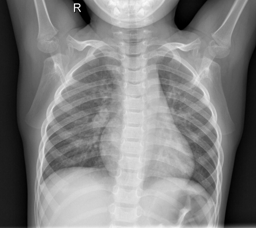

In [2]:
Image.open("./chest_xray/train/NORMAL/IM-0115-0001.jpeg").to_thumb(256, 256)

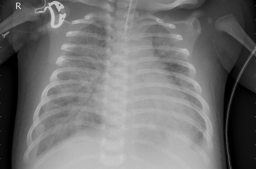

In [3]:
Image.open("./chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg").to_thumb(256, 256)

Normally, there would be a step to validate and clean the images, but this process has already been done on the Kaggle dataset, so there are no invalid images. A thing that I noticed though, is that these images are inconsitent in size, and might have features that could distract the model from its classification task. We will proceed with a pretrained model and fine-tune it to work with this task.

## Model Training

In this step, we will load the model into a datablock, preprocess the images there and proceed to train out model.

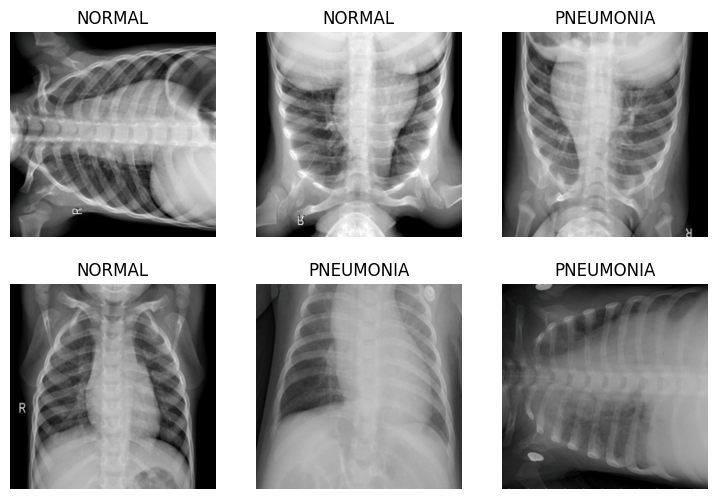

In [4]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=60),
    get_y=parent_label,
    item_tfms=[Resize(224, method="squish"), DihedralItem(0.75)],
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
).dataloaders(Path("./chest_xray/train_test/"), bs=32)

db.show_batch(max_n=6)

epoch,train_loss,valid_loss,accuracy,time
0,0.663087,0.247377,0.903253,03:08
1,0.339029,0.162736,0.952055,03:09
2,0.272211,0.196912,0.940068,02:40
3,0.222607,0.148117,0.952911,02:38
4,0.179475,0.126151,0.957192,02:37
5,0.183971,0.134865,0.953767,02:35
6,0.171382,0.110451,0.965753,02:43
7,0.165779,0.112149,0.964041,02:51
8,0.157664,0.111643,0.963185,02:44
9,0.140216,0.112876,0.962329,02:51


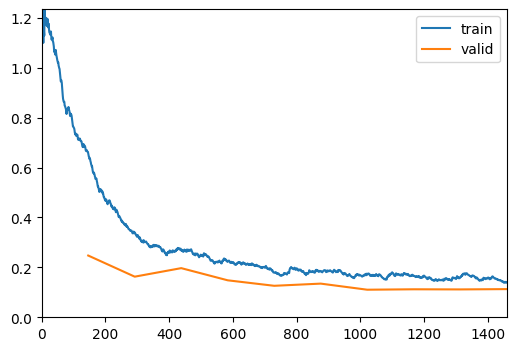

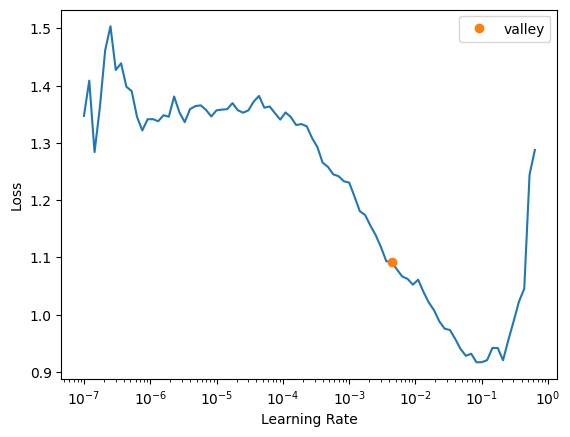

In [5]:
model = vision_learner(db, alexnet, metrics=accuracy)
model.lr_find()
model.fit_one_cycle(10, slice(1e-4, 1e-3), cbs=[ShowGraphCallback()])

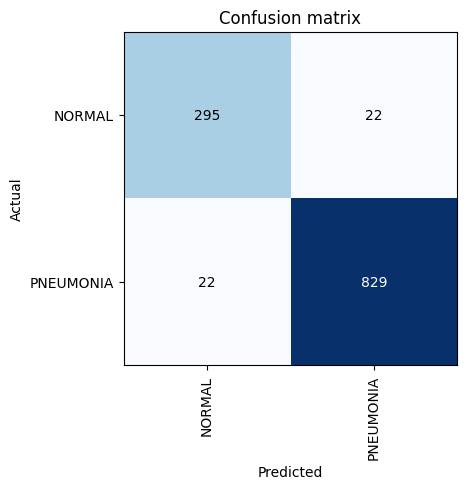

In [6]:
interpretation = ClassificationInterpretation.from_learner(model)
interpretation.plot_confusion_matrix()